In [1]:
! pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from imutils import paths
import os
import time
import random
import pickle
import warnings
from tqdm import tqdm_notebook as tqdm
import itertools
warnings.filterwarnings("ignore")

In [15]:
list(paths.list_images('Dataset'))[0].split(sep='\\')[1]

'Buildings'

In [17]:

data=[]
labels=[]
clases=['forest','buildings','sea']

In [19]:
image_paths= sorted(list(paths.list_images('Dataset')))
image_paths

['Dataset\\Buildings\\0 (1).jpg',
 'Dataset\\Buildings\\1001 (1).jpg',
 'Dataset\\Buildings\\1009 (1).jpg',
 'Dataset\\Buildings\\1012 (1).jpg',
 'Dataset\\Buildings\\1028 (1).jpg',
 'Dataset\\Buildings\\1041 (1).jpg',
 'Dataset\\Buildings\\1045 (1).jpg',
 'Dataset\\Buildings\\1055 (1).jpg',
 'Dataset\\Buildings\\1058 (1).jpg',
 'Dataset\\Buildings\\1064 (1).jpg',
 'Dataset\\Buildings\\1090 (1)(1).jpg',
 'Dataset\\Buildings\\1090 (1).jpg',
 'Dataset\\Buildings\\1093 (1).jpg',
 'Dataset\\Buildings\\1104 (1).jpg',
 'Dataset\\Buildings\\1107 (1).jpg',
 'Dataset\\Buildings\\1112 (1).jpg',
 'Dataset\\Buildings\\112 (1).jpg',
 'Dataset\\Buildings\\1161 (1).jpg',
 'Dataset\\Buildings\\1193 (1).jpg',
 'Dataset\\Buildings\\1196 (1).jpg',
 'Dataset\\Buildings\\1201 (1).jpg',
 'Dataset\\Buildings\\1204 (1).jpg',
 'Dataset\\Buildings\\1220 (1).jpg',
 'Dataset\\Buildings\\1221 (1).jpg',
 'Dataset\\Buildings\\1231 (1).jpg',
 'Dataset\\Buildings\\1242 (1).jpg',
 'Dataset\\Buildings\\1244 (1)(1).jpg',

In [20]:
random.seed(0)
random.shuffle(image_paths)

with tqdm(total=len(image_paths)) as pbar:
  for image_path in image_paths:
    imae= cv2.imread(image_path)
    image= cv2.resize(imae,(120,120)).flatten()
    data.append(image)
    label= image_path.split(os.path.sep)[-2]
    if label=='buildings':
      label=0
    elif label=='forest':
      label=1
    else:
      label=2
    labels.append(label)
    pbar.update(1)

  0%|          | 0/1437 [00:00<?, ?it/s]

In [21]:
labels

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [22]:
data

[array([103,  93,  93, ..., 116, 184, 174], dtype=uint8),
 array([18, 16,  5, ...,  2,  6,  7], dtype=uint8),
 array([151, 165, 163, ..., 135, 153, 152], dtype=uint8),
 array([ 57,  77, 103, ...,   4,  11,  20], dtype=uint8),
 array([ 28, 156, 117, ...,   1,   7,   1], dtype=uint8),
 array([244, 207, 173, ..., 207, 219, 223], dtype=uint8),
 array([255, 255, 255, ...,  15,  15,  15], dtype=uint8),
 array([247, 203, 119, ...,  46,  39,  22], dtype=uint8),
 array([ 33,  50,  49, ..., 137, 159, 202], dtype=uint8),
 array([ 83,  84,  75, ..., 159, 160, 173], dtype=uint8),
 array([ 68,  96, 208, ..., 137, 151, 149], dtype=uint8),
 array([198, 156,  91, ...,  46,  65,  70], dtype=uint8),
 array([17, 25, 22, ..., 24, 43, 56], dtype=uint8),
 array([24, 70, 72, ..., 14, 46, 51], dtype=uint8),
 array([40, 27,  9, ..., 36, 29,  8], dtype=uint8),
 array([44, 42, 42, ..., 19, 19, 19], dtype=uint8),
 array([ 63,  88, 106, ...,   5,   2,   6], dtype=uint8),
 array([ 35,  74, 120, ..., 189, 190, 188], 

In [23]:
data=np.array(data,dtype='float')/255.0
labels=np.array(labels)

In [24]:
data

array([[0.40392157, 0.36470588, 0.36470588, ..., 0.45490196, 0.72156863,
        0.68235294],
       [0.07058824, 0.0627451 , 0.01960784, ..., 0.00784314, 0.02352941,
        0.02745098],
       [0.59215686, 0.64705882, 0.63921569, ..., 0.52941176, 0.6       ,
        0.59607843],
       ...,
       [0.98823529, 0.96862745, 0.93333333, ..., 0.55686275, 0.54117647,
        0.50196078],
       [0.80784314, 0.95686275, 0.98823529, ..., 0.05098039, 0.49411765,
        0.56078431],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.06666667, 0.04705882,
        0.05098039]])

In [25]:
print(data[:10],labels[:10])

[[0.40392157 0.36470588 0.36470588 ... 0.45490196 0.72156863 0.68235294]
 [0.07058824 0.0627451  0.01960784 ... 0.00784314 0.02352941 0.02745098]
 [0.59215686 0.64705882 0.63921569 ... 0.52941176 0.6        0.59607843]
 ...
 [0.96862745 0.79607843 0.46666667 ... 0.18039216 0.15294118 0.08627451]
 [0.12941176 0.19607843 0.19215686 ... 0.5372549  0.62352941 0.79215686]
 [0.3254902  0.32941176 0.29411765 ... 0.62352941 0.62745098 0.67843137]] [2 2 2 2 2 2 2 2 2 2]


In [26]:
X= pd.DataFrame(data)
y= pd.DataFrame(labels)

In [27]:
X= X.values
y= y.values

In [28]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [29]:
X_train.shape

(1005, 43200)

In [30]:
y_train.shape

(1005, 1)

In [31]:
y_train= to_categorical(y_train, num_classes=3)
y_test= to_categorical(y_test, num_classes=3)

In [32]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

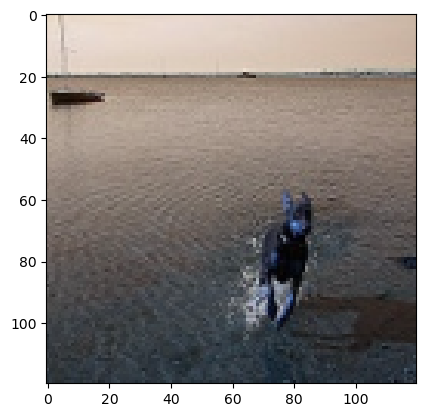

In [33]:
sample_image=(X_train[0]*255).astype('int')
plt.imshow(sample_image.reshape(120,120,3))

In [34]:
model=Sequential()
model.add(Dense(1024,input_shape=(43200,),kernel_initializer ='uniform',activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [35]:
from tensorflow.keras.optimizers import SGD
lr= 0.05
ep= 50
opt= SGD(learning_rate= lr)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │    44,237,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,764,163 (170.76 MB)

 Trainable params: 44,764,163 (170.76 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
time1=time.time()
model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test))
time2=time.time()
print("required yime to train:", time2-time1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 205ms/step - accuracy: 0.8760 - loss: 0.6927 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/s

In [38]:

model=Sequential()
model.add(Dense(1024,input_shape=(43200,),kernel_initializer ='uniform',activation='relu'))
model.add(Dense(units=512,kernel_initializer ='uniform', activation='relu'))
model.add(Dense(units=256,kernel_initializer ='uniform', activation='relu'))
model.add(Dense(units=3,kernel_initializer ='uniform', activation='softmax'))

lr=0.05
ep=50

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test))
time2=time.time()
print("required time to train:", time2-time1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1024)           │    44,237,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,894,723 (171.26 MB)

 Trainable params: 44,894,723 (171.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 471ms/step - accuracy: 0.8799 - loss: 0.1457 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 439ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 444ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 448ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 440ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 439ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 438ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 441